In [110]:
#Importing important packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import networkx as nx
from matplotlib import rc


In [3]:
#Viewing of dataset
europe_df = pd.read_excel('WDIW Dataset.xlsx')
europe_df.head()

,Country Code,Country Name,Hult Region,Cool Name,Access to electricity (% of population),"Access to electricity, rural (% of rural population)","Access to electricity, urban (% of urban population)","Adolescent fertility rate (births per 1,000 women ages 15-19)",Age dependency ratio (% of working-age population),"Age dependency ratio, old (% of working-age population)",...,Poverty headcount ratio at national poverty lines (% of population),"Prevalence of HIV, total (% of population ages 15-49)",Prevalence of undernourishment (% of population),"Prevalence of underweight, weight for age (% of children under 5)",Rural population (% of total population),"Services, value added (% of GDP)",Surface area (sq. km),Tax revenue (% of GDP),Urban population (% of total population),Urban population growth (annual %)
0,AFG,Afghanistan,Middle East & Russia,Mirage,97.7,97.091973,99.5,68.957,86.000753,4.750925,...,NaN,0.1,29.8,NaN,74.750,52.655431,652860.0,9.250468,25.250,3.463407
1,ALB,Albania,Eastern Europe,Skids & Mudflap,100.0,100.000000,100.0,19.642,45.682097,19.418064,...,NaN,NaN,6.2,NaN,40.617,47.965907,28750.0,18.879748,59.383,1.541285
2,DZA,Algeria,Northern Sub-Saharan Africa,Bumblebee,100.0,100.000000,100.0,10.071,55.804001,9.624334,...,NaN,0.1,3.9,NaN,27.948,45.615016,2381740.0,NaN,72.052,2.871374
3,ASM,American Samoa,Australia & Oceania,Cliffhanger,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,12.830,NaN,200.0,NaN,87.170,-0.249256
4,AND,Andorra,Eastern Europe,Skids & Mudflap,100.0,100.000000,100.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,11.850,79.285586,470.0,NaN,88.150,-0.495265


In [8]:
#Selecting only Eastern Europe
east_eu = europe_df.loc[europe_df['Cool Name'] == 'Skids & Mudflap']
east_eu

,Country Code,Country Name,Hult Region,Cool Name,Access to electricity (% of population),"Access to electricity, rural (% of rural population)","Access to electricity, urban (% of urban population)","Adolescent fertility rate (births per 1,000 women ages 15-19)",Age dependency ratio (% of working-age population),"Age dependency ratio, old (% of working-age population)",...,Poverty headcount ratio at national poverty lines (% of population),"Prevalence of HIV, total (% of population ages 15-49)",Prevalence of undernourishment (% of population),"Prevalence of underweight, weight for age (% of children under 5)",Rural population (% of total population),"Services, value added (% of GDP)",Surface area (sq. km),Tax revenue (% of GDP),Urban population (% of total population),Urban population growth (annual %)
1,ALB,Albania,Eastern Europe,Skids & Mudflap,100.0,100.0,100.0,19.642,45.682097,19.418064,...,NaN,NaN,6.2,NaN,40.617,47.965907,28750.000000,18.879748,59.383,1.541285
4,AND,Andorra,Eastern Europe,Skids & Mudflap,100.0,100.0,100.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,11.850,79.285586,470.000000,NaN,88.150,-0.495265
24,BIH,Bosnia & Herzegovina,Eastern Europe,Skids & Mudflap,100.0,100.0,100.0,9.642,43.979067,22.676345,...,NaN,0.1,2.5,NaN,52.124,55.781042,51210.000000,20.259337,47.876,-0.280615
47,HRV,Croatia,Eastern Europe,Skids & Mudflap,100.0,100.0,100.0,8.681,52.579572,30.550089,...,19.4,0.1,2.5,NaN,43.333,57.811759,56590.000000,21.610752,56.667,-0.733638
51,CZE,Czech Republic,Eastern Europe,Skids & Mudflap,100.0,100.0,100.0,11.972,52.397391,28.950481,...,NaN,0.1,2.5,NaN,26.325,54.460285,78870.000000,14.877358,73.675,0.408265
62,EST,Estonia,Eastern Europe,Skids & Mudflap,100.0,100.0,100.0,7.698,55.123161,29.959223,...,NaN,0.9,2.9,NaN,31.283,59.951242,45340.000000,21.124059,68.717,0.345467
67,FIN,Finland,Eastern Europe,Skids & Mudflap,100.0,100.0,100.0,5.813,60.076618,34.062301,...,NaN,0.1,2.5,NaN,14.675,59.620039,338450.000000,20.937129,85.325,0.293288
76,GRC,Greece,Eastern Europe,Skids & Mudflap,100.0,100.0,100.0,7.223,55.289532,33.230959,...,NaN,NaN,2.5,NaN,21.276,68.667852,131960.000000,26.262142,78.724,0.231212
87,HUN,Hungary,Eastern Europe,Skids & Mudflap,100.0,100.0,100.0,23.979,49.142708,27.707529,...,NaN,0.1,2.5,NaN,28.938,55.244699,93030.000000,23.216223,71.062,0.133177
105,XKX,Kosovo,Eastern Europe,Skids & Mudflap,100.0,100.0,100.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,45.799592,10887.000000,NaN,NaN,NaN


In [11]:
#Initial exploration 
east_eu.describe().round(1)

,Access to electricity (% of population),"Access to electricity, rural (% of rural population)","Access to electricity, urban (% of urban population)","Adolescent fertility rate (births per 1,000 women ages 15-19)",Age dependency ratio (% of working-age population),"Age dependency ratio, old (% of working-age population)","Age dependency ratio, young (% of working-age population)","Agriculture, forestry, and fishing, value added (% of GDP)",Armed forces personnel (% of total labor force),"Birth rate, crude (per 1,000 people)",...,Poverty headcount ratio at national poverty lines (% of population),"Prevalence of HIV, total (% of population ages 15-49)",Prevalence of undernourishment (% of population),"Prevalence of underweight, weight for age (% of children under 5)",Rural population (% of total population),"Services, value added (% of GDP)",Surface area (sq. km),Tax revenue (% of GDP),Urban population (% of total population),Urban population growth (annual %)
count,22.0,22.0,22.0,19.0,19.0,19.0,19.0,20.0,19.0,20.0,...,3.0,13.0,19.0,0.0,21.0,20.0,22.0,17.0,21.0,21.0
mean,100.0,100.0,100.0,11.8,51.0,27.2,23.8,4.4,1.2,10.5,...,18.8,0.2,3.0,NaN,29.8,59.2,115846.6,20.8,70.2,0.3
std,0.0,0.0,0.0,6.2,5.0,4.6,2.2,4.2,1.0,1.8,...,3.7,0.2,1.1,NaN,14.5,8.3,164632.9,3.8,14.5,0.9
min,100.0,100.0,100.0,3.8,42.7,18.9,21.3,0.5,0.4,8.2,...,14.8,0.1,2.5,NaN,2.9,45.8,60.0,14.9,47.9,-1.2
25%,100.0,100.0,100.0,7.5,47.7,23.8,22.0,2.0,0.7,9.2,...,17.1,0.1,2.5,NaN,18.1,55.1,21933.8,17.7,57.7,-0.3
50%,100.0,100.0,100.0,10.5,51.6,28.8,23.4,3.1,0.9,10.6,...,19.4,0.1,2.5,NaN,31.9,57.6,53900.0,20.9,68.1,0.3
75%,100.0,100.0,100.0,15.2,53.8,30.4,25.6,5.7,1.0,10.8,...,20.8,0.1,2.7,NaN,42.3,61.7,91862.5,23.2,81.9,0.5
max,100.0,100.0,100.0,25.7,60.1,34.1,28.0,19.0,4.6,16.4,...,22.2,0.9,6.2,NaN,52.1,79.3,625217.1,27.9,97.1,2.8


In [14]:
#Total GDP Eastern Europe
total_GDP = east_eu['GDP (current US$)'].sum().round(0)
f"{total_GDP:,}"

'2,692,425,617,859.0'

In [16]:
#Percentage GDP per country in the region
GDP_share = 100*east_eu['GDP (current US$)'].round(0)/east_eu['GDP (current US$)'].sum().round(0)
GDP_share

1       0.483767
4       0.111921
24      0.671518
47      2.050249
51      8.019295
62      0.988389
67      9.371889
76      7.542847
87      5.190901
105     0.268448
109     1.131445
115     1.765860
118     0.418935
124     0.473506
133     0.179934
147    14.837509
156    19.550067
167     0.060646
171     1.638687
176     3.551358
177     1.799712
187    19.893117
Name: GDP (current US$), dtype: float64

In [17]:
#Country codes
country_df = east_eu.loc[:,['Country Name']]

In [35]:
#Combine country names with GDP share and sort
GDP_share_complete = pd.concat([country_df,GDP_share], axis=1, join='inner')
GDP_share_complete = GDP_share_complete.sort_values(by=['GDP (current US$)'],ascending=False).round(1)

#Renaming of columns 
GDP_share_complete.columns = ['Country', 'GDP Share']
GDP_share_complete

,Country,GDP Share
187,Sweden,19.9
156,Poland,19.6
147,Norway,14.8
67,Finland,9.4
51,Czech Republic,8.0
76,Greece,7.5
87,Hungary,5.2
176,Slovakia,3.6
47,Croatia,2.1
177,Slovenia,1.8


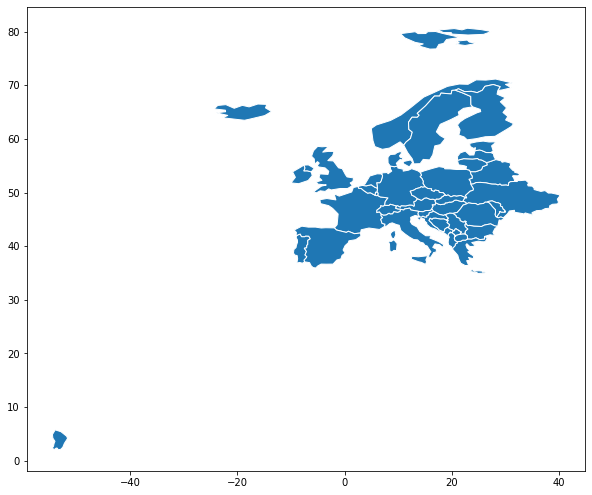

In [38]:
#Map of Europe
europe_map = world_map[(world_map.continent=="Europe")&(world_map.name!="Russia")]
europe_map.plot(figsize=(10,10), alpha=1, edgecolor='w')

In [82]:
#Exploring European Map
europe_map

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
21,5320045,Europe,Norway,-99,364700.0,"MULTIPOLYGON (((15.14282 79.67431, 15.52255 80..."
43,67106161,Europe,France,-99,2699000.0,"MULTIPOLYGON (((-51.65780 4.15623, -52.24934 3..."
110,9960487,Europe,Sweden,SWE,498100.0,"POLYGON ((11.02737 58.85615, 11.46827 59.43239..."
111,9549747,Europe,Belarus,BLR,165400.0,"POLYGON ((28.17671 56.16913, 29.22951 55.91834..."
112,44033874,Europe,Ukraine,UKR,352600.0,"POLYGON ((31.78599 52.10168, 32.15944 52.06125..."
113,38476269,Europe,Poland,POL,1052000.0,"POLYGON ((23.48413 53.91250, 23.52754 53.47012..."
114,8754413,Europe,Austria,AUT,416600.0,"POLYGON ((16.97967 48.12350, 16.90375 47.71487..."
115,9850845,Europe,Hungary,HUN,267600.0,"POLYGON ((22.08561 48.42226, 22.64082 48.15024..."
116,3474121,Europe,Moldova,MDA,18540.0,"POLYGON ((26.61934 48.22073, 26.85782 48.36821..."
117,21529967,Europe,Romania,ROU,441000.0,"POLYGON ((28.23355 45.48828, 28.67978 45.30403..."


In [103]:
#Inner Joining Europe Map with East Europe list to filter out only East Europe Countries
east_eu_map = pd.merge(europe_map,east_eu,how='inner',left_on=['iso_a3'],right_on=['Country Code'])

In [106]:
#Cleaning East Europe Map to only necessary columns for plotting 
east_eu_map = east_eu_map.iloc[:,:6]


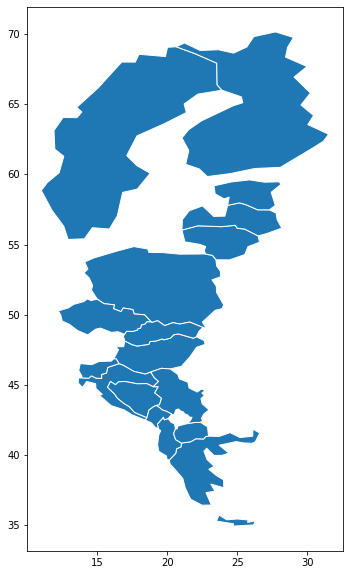

In [107]:
#Plotting only eastern Europe
east_eu_map.plot(figsize=(10,10), alpha=1, edgecolor='w')